<a href="https://colab.research.google.com/github/brianrebollarjuarez1/Ejercicios-Simulacion-I-7MM1/blob/main/Integracion_por_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integracion por Metodo Monte Carlo

Cuando una integral es dificil de calcular analiticamente, utilizamos el metodo de Integracion Monte Carlo, el cual se basa en la aproximacion de valor de integral por sumas de Riemann, ademas de realizar una transformacion,escribiendo la funcion como un producto de la longitud del intervalo multiplicada por la funcion objetivo por la funcion de distribucion uniforme:

$g(x) = w(x)f(x)$ con $w(x) = g(x)(b-a)$ y $f(x) = \frac{1}{b - a}$

Utilizaremos la simulacion Monte Carlo para aproximar el valor de la integral, es decir, generaremos $n$ numeros aleatorios, y repetiremos el experimento $N$ veces para obtener la mejor aproximacion de la integral.

## Metodo de la Media Muestral

Basado en la ley de los grandes numeros, consiste en generar una muestra de numeros aleatorios lo suficientemente grande, de tal manera que el promedio de las evaluaciones de la funcion, se aproxime al valor esperado de g(x), que sera la funcion de distribucion uniforme multiplicado por la aproximacion del valor de la integral.

$\frac{1}{N} \sum _{i = 1}^N g(x_i) = \frac{I}{b-a}$

Para ilustrar este metodo, utilizaremos de ejemplo la siguiente integral:

$\int _0 ^1 \sqrt{arctan(x)}$ $dx$

La cual es dificil de calcular analiticamente, por ello utilizaremos Monte Carlo para hallar su valor.

Utilizando un software, la integral nos da un valor de:

$\int _0 ^1 \sqrt{arctan(x)}$ $dx$ $= 0.62982...$

Importamos librerias:

In [43]:
import numpy as np #Numpy para manejar arreglos
import matplotlib.pyplot as plt #plt para graficar histogramas y fda
import random as rnd #random para generar numero alea

Aplicando el metodo, primero programamos la funcion:

In [44]:
def f(x): #Llamamos f a la funcion objetivo
    return np.sqrt(np.arctan(x)) # Funcion objetivo

Hallamos la funcion acumulativa de las aproximaciones a traves del truco visto en clase.

In [45]:
def cdf(x):
    n = len(x)
    y = np.sort(x)
    g = np.arange(n)/n
    return y,g

Primero realizamos el experimento, utilizando el pseudocodigo del metodo de Monte Carlo por Media Muestral:

In [46]:
def MM(a,b,n,f):
  u = np.random.uniform(0,1,n) #Generamos n numeros aleatorios con distribucion uniforme
  G = [] #Aqui se guardaran los valores de funcion obtenidos
  for i in range(n):
    x = a + u[i] * (b - a) #Se calculan los valores de funcion para obtener su promedio
    G.append(f(x))
  return np.mean(G) #Sale el promedio de los valores obtenidos

Ahora procedemos con la simulacion Monte Carlo, donde repetimos el experimento N veces, obteniendo la media de cada uno de ellos para lograr la mejor aproximacion del valor de la integral

In [47]:
def MC_MM(a,b,N,n,f):
  I = [] #Aqui guardamos las medias obtenidas en cada uno de los experimentos
  for i in range(N):
    I.append(MM(a,b,n,f)) #Obtenemos las medias y las guardamos
  return I

Para nuestro experimento, cada una de las muestras tendra 100 numeros aleatorios y repetiremos el experimento 10000 veces

In [48]:
n = 100
N = 10000
a = 0
b = 1 #Extremos del intervalo de integracion

Realizamos la simulacion:

In [55]:
I = MC_MM(a,b,N,n,f)

y obtenemos la aproximacion, a traves de la media de todos los experimentos:

In [56]:
media = np.mean(I)
media

0.629578641160818

La cual se aproxima bastante bien al valor obtenido en software.

Graficamos el histograma para ver el comportamiento de las medias de los experimentos:

(array([  1.,   1.,   3.,   1.,   6.,   4.,   7.,   5.,   4.,  15.,  10.,
         11.,   8.,  14.,  20.,  26.,  33.,  26.,  38.,  36.,  36.,  49.,
         46.,  68.,  72.,  64.,  85.,  81.,  93., 108., 129., 122., 143.,
        176., 180., 167., 173., 214., 205., 208., 201., 216., 238., 255.,
        276., 254., 257., 256., 268., 262., 289., 244., 285., 268., 266.,
        263., 236., 265., 209., 217., 226., 179., 171., 149., 154., 166.,
        141., 129., 120., 104.,  94.,  93.,  78.,  75.,  67.,  54.,  42.,
         32.,  33.,  28.,  27.,  20.,  16.,  16.,   9.,  18.,   8.,   7.,
          7.,   6.,   3.,   5.,   1.,   3.,   1.,   0.,   2.,   1.,   1.,
          1.]),
 array([0.5610145 , 0.56241213, 0.56380976, 0.56520739, 0.56660502,
        0.56800264, 0.56940027, 0.5707979 , 0.57219553, 0.57359316,
        0.57499079, 0.57638841, 0.57778604, 0.57918367, 0.5805813 ,
        0.58197893, 0.58337656, 0.58477418, 0.58617181, 0.58756944,
        0.58896707, 0.5903647 , 0.59176233, 0.

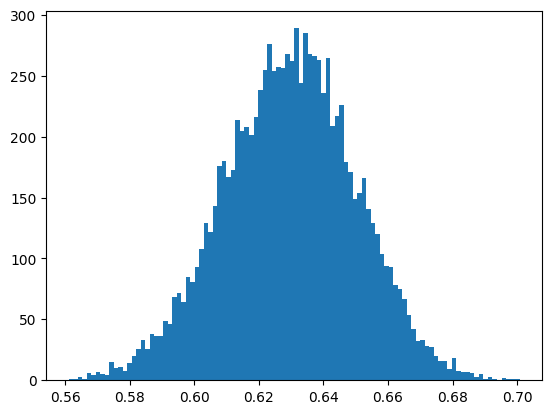

In [57]:
plt.hist(I,bins = 100)

Podemos ver que se comporta como una distribucion normal, lo que va de acuerdo al teorema central del limite, que nos dice que con una muestra suficientemente grande, esta se distribuira con una funcion de distribucion normal.

Obtenemos la funcion de distribucion acumulativa:

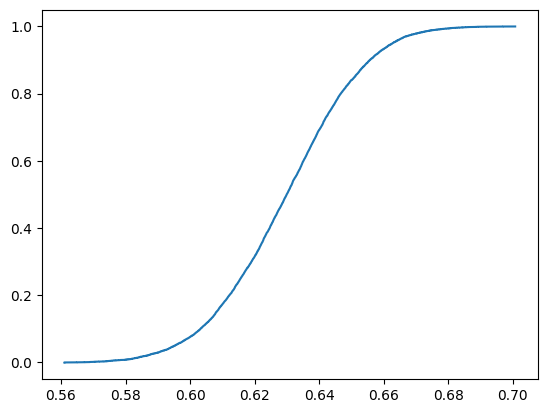

In [58]:
y,g = cdf(I) #Utilizando el truco visto en clase
plt.step(y,g)

La funcion de distribucion acumulativa coincide con la distribucion acumulativa normal.

Para hallar el intervalo de confianza del valor de la integral, hallamos la desviacion estandar de las medias muestrales.

In [59]:
desvest = np.std(I)
desvest

0.020466968472592287

Queremos un $\alpha = 5\%$, por lo tanto, usamos $Z = 1.96$ para el intervalo de confianza, quedando como:

$(\theta_2 - 1.96\sigma,\theta_2 + 1.96\sigma)$

In [60]:
print("(",media - 1.96*desvest,";",media + 1.96*desvest,")")

( 0.589463382954537 ; 0.6696938993670989 )


Podemos decir con un $95 \%$ de confianza que el valor de aproximacion de la integral, se encontrara entre los valores mostrados arriba.

## Metodo de Acierto y Error

Consiste en considerar el area bajo la curva de una region rectangular como $[(x,g(x)) : a \leq x \leq b $ y $0 \leq g(x) \leq c]$, generando puntos aleatorios $(x,y)$ y calculando el numero de veces que este cae dentro de la region, obteniendo la probabilidad empirica de que el punto caiga dentro de la region:

$p = \frac{n_{\alpha}}{n} = \frac{I}{c(b-a)} \rightarrow I ≈ c(b-a) \frac{n_{\alpha}}{n}$

Con simulacion Montecarlo, repetiremos N veces para obtener la mejor aproximacion.

Ya teniendo la funcion, realizamos el experimento de Acierto y Error, eligiendo $c = 1$:

In [61]:
def AE(a,b,c,n,f):
  u = np.random.uniform(0,1,2*n) #Generamos n numeros aleatorios con distribucion uniforme
  #Para temas computacionales, no necesitamos generar pares, solo necesitamos llamarlos del arreglo.
  nalpha = 0 #Contador para el numero de veces que el punto cae en la region
  for i in range(n):
    x = a + u[i]*(b-a)
    if f(x) > c*u[n + i]:
      nalpha += 1 #Si el punto cae dentro de la region, se suma un acierto al contador
  return c*(b-a)*(nalpha/n) #Obtenemos la probabilidad empirica

Como parte de la simulacion Monte Carlo, repetimos el experimento N veces.

In [62]:
def MC_AE(a,b,c,N,n,f):
  I = [] #Aqui guardamos las medias obtenidas en cada uno de los experimentos
  for i in range(N):
    I.append(AE(a,b,c,n,f)) #Obtenemos las medias y las guardamos
  return I

Para este experimento y la comparacion, utilzaremos muestras de 100 numeros y repetimos 10000 veces.

In [63]:
c = 1 #Valor de acotamiento de f

In [65]:
I2 = MC_AE(a,b,c,N,n,f)

Calculamos la media de la simulacion de Montecarlo para obtener la mejor aproximacion.

In [66]:
media2 = np.mean(I2)
media2

0.629498

Comparando, la aproximacion obtenida en la simulacion del metodo de medias muestrales se acerca mas al valor por una diferencia aproximada de $0.0008$, por lo que ambas son buenas, aunque la de medias muestrales se aproxima un poco mejor.

Generando histograma para ver el comportamiento de las medias.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  14.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  60.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,  93.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

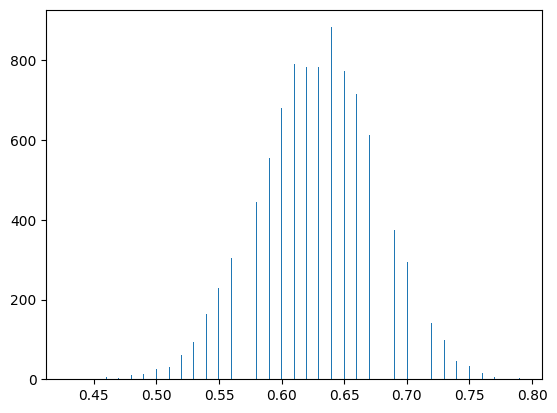

In [69]:
plt.hist(I2,bins = 500)

Como era de esperarse, tambien se presenta una distribucion normal, con media siendo la aproximacion obtenida.

Calculando distribucion acumulativa, se espera que tambien se asemeje a la de la distribucion normal.

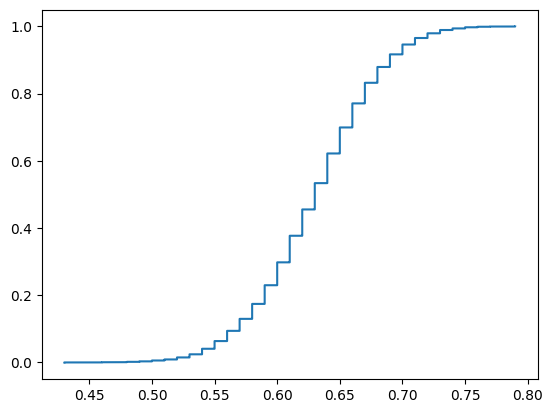

In [70]:
y2,g2 = cdf(I2) #Usando el truco visto en clase
plt.step(y2,g2)

Evidentemente como hay factores que se rechazan, en ambas graficas pueden verse factores faltantes, causando que no se genere una curva suave y dejando "huecos", pero las distribuciones se siguen viendo.

Finalmente generando el intervalo de confianza con un $\alpha = 5\%$:

$(\theta_2 - 1.96\sigma,\theta_2 + 1.96\sigma)$

In [71]:
print("(",media2 - 1.96*desvest,";",media2 + 1.96*desvest,")")

( 0.5893827417937191 ; 0.6696132582062809 )


Los intervalos de confianza son demasiado similares, pero el obtenido por medias muestrales es un poco mas cerrado.